In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Load Data
data = np.loadtxt("SANTANG-1 - Copy.las", skiprows=7198)
# data[data==-999.2500]=np.nan
column = ['DEPTH','CALI','RHOB','DT','DTS','GR','LLD','LLS','MSFL','NPHI','PEF','SP']
data = pd.DataFrame(data, columns=column)
data = data.drop([7420],axis=0)
data['LLD'] = np.log(data[['LLD']])
data['LLS'] = np.log(data[['LLS']])
Depth = data[['DEPTH']].values

    Code                              Lithology
0      1                        ClayeySandstone
1      2                              Sandstone
2      3   Claystone Interbed Shale & Sandstone
3      4             Interbed Sandstone & Shale
4      5               Shale interbed Sandstone
5      6               Sandstone interbed Shale
6      7   Shale interbed Sandstone & Siltstone
7      8  Interbed Shale, Siltstone & Sandstone
8      9              Interbed Sitstone & Shale
9     10   Siltstone interbed Shale & Sandstone
10    11               Siltstone interbed Shale
11    12   Sandstone interbed Claystone & Shale
12    13           Claystone interbed Sandstone
13    14                              Greywacke


C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


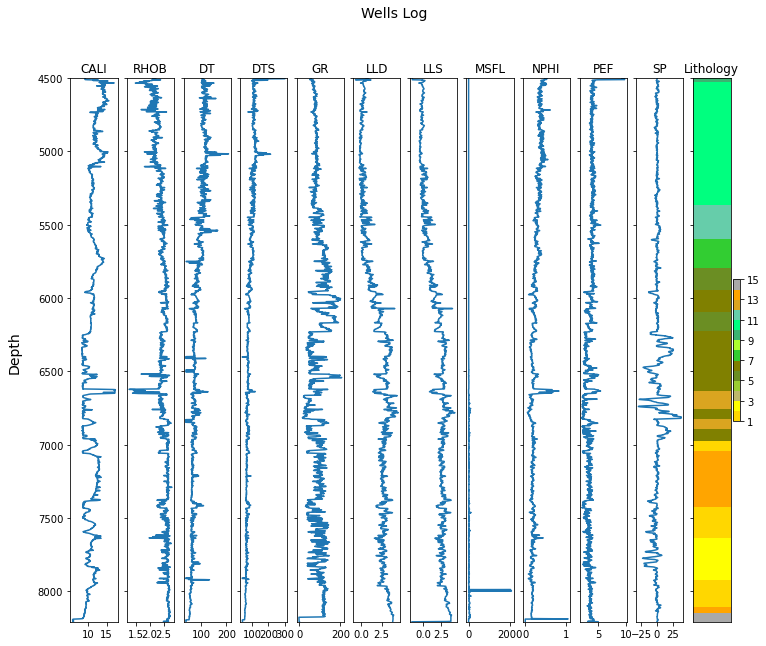

In [ ]:
from collections import OrderedDict
from matplotlib.colors import from_levels_and_colors

Code = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
Lit = np.array(['ClayeySandstone','Sandstone','Claystone Interbed Shale & Sandstone','Interbed Sandstone & Shale','Shale interbed Sandstone','Sandstone interbed Shale','Shale interbed Sandstone & Siltstone','Interbed Shale, Siltstone & Sandstone','Interbed Sitstone & Shale','Siltstone interbed Shale & Sandstone','Siltstone interbed Shale','Sandstone interbed Claystone & Shale','Claystone interbed Sandstone','Greywacke'])
Clr = np.array(['gold', 'yellow', 'darkkhaki', 'yellowgreen', 'olivedrab', 'olive', 'limegreen', 'greenyellow', 'mediumseagreen', 'springgreen', 'mediumaquamarine', 'goldenrod', 'orange', 'darkgrey'])
Litho = pd.DataFrame( OrderedDict( (('Code', pd.Series(Code)), ('Lithology', pd.Series(Lit))) ) )
print(Litho)

##Visualisasi Data
well = data[['DEPTH','CALI','RHOB','DT','DTS','GR','LLD','LLS','MSFL','NPHI','PEF','SP']].values
Litologi = np.loadtxt("SumurLitologi.txt", skiprows=7160)
columns = ['DEPTH','Lithology']
Litologi = pd.DataFrame(Litologi, columns=columns)
Lithology = Litologi[['Lithology']].values

row,col = 1,12
fig,ax = plt.subplots(nrows=row,ncols=col,figsize=(12,10),sharey=True)
for i in range (col):
    if i < col-1:
        ax[i].plot(well[:,i+1], well[:,0])
        ax[i].set_ylim(max(well[:,0]), min(well[:,0]))
        ax[i].set_title(column[i+1])
    elif i==col-1:
        cmap, norm = from_levels_and_colors(Code + [15],Clr)
        a = ax[i].pcolormesh(x[None,:], Depth, Lithology, cmap=cmap, norm=norm)
        ax[i].set(xticks=[], title='Lithology')
        ax[i].invert_yaxis()
        ax[i].set_ylim(max(well[:,0]), min(well[:,0]))
        ax[i].margins(0)
fig.suptitle('Wells Log',fontsize=14)
fig.text(0.06, 0.5, 'Depth', ha='center', va='center', rotation='vertical',fontsize=14)
# fig.legend(handles=ax[11],loc='upper center', bbox_to_anchor=(0.5, 0.05),labels=Lit)
fig.colorbar(a)
plt.show()